In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos
from qutip import *

In [2]:
#----- Initializing Parameters
n = 100 # Size of Truncated Hilbert Spaces
##Frequencies in GHz
omega_c = 2*np.pi * 9.07
delta   = 2*np.pi * -1.0
g       = 2*np.pi * 0.2
kappa   = 2*np.pi * 0.001
## Derived Quantities
chi = g**2/delta
xi1 = kappa/sqrt(2)
## Generating time points for simulation

In [3]:
#----- Setting up Operators and Hamiltonians
## Operators
a = destroy(n)
sz = -1.*identity(n)

##N = a.dag()*a + sz/2 + 1./2
N = a.dag()*a
D = (delta**2 + (4*g**2)*N).sqrtm()

## Hamiltonians
H0 = omega_c*(a.dag()*a) + (omega_c-D)*(sz/2)

H1 = a + a.dag()
def H1_coeff(t, args):
    xi = args['xi']
    omega_d = args['omega_d']
    return xi*np.cos(omega_d*t)/sqrt(2)

H = [H0, [H1, H1_coeff]]

In [4]:
#----- Setting up parameters for simulation
## Detuning
d = 0.7
omega_d = d*abs(chi) + omega_c

## Drive Amplitude
xi = 6.3*xi1

## Setting up Expectation and Collapse Operators
e_op = [a.dag()*a, a]
c_op = [sqrt(kappa)*a]

## Setting up additional parameters for solver
cyclePeriod = 2*np.pi/omega_d
cycleRes = 20
cycleCount = 10
t = np.linspace(0, cyclePeriod*cycleCount, num=cycleRes*cycleCount+1)

H_args = {'xi':xi, 'omega_d':omega_d}

opts = Options(num_cpus=6)
## Creating initial state
psi0 = fock(n, 0)

In [5]:
%time data = mcsolve(H, psi0, t, c_op, e_op, args=H_args,\
                    progress_bar=True, options=opts)

10.0%. Run time:   2.11s. Est. time left: 00:00:00:18
20.0%. Run time:   4.06s. Est. time left: 00:00:00:16
30.0%. Run time:   5.94s. Est. time left: 00:00:00:13
40.0%. Run time:   7.80s. Est. time left: 00:00:00:11
50.0%. Run time:   9.77s. Est. time left: 00:00:00:09
60.0%. Run time:  11.62s. Est. time left: 00:00:00:07
70.0%. Run time:  13.49s. Est. time left: 00:00:00:05
80.0%. Run time:  15.45s. Est. time left: 00:00:00:03
90.0%. Run time:  17.37s. Est. time left: 00:00:00:01
100.0%. Run time:  19.16s. Est. time left: 00:00:00:00
Total run time:  19.21s
CPU times: user 1.77 s, sys: 102 ms, total: 1.88 s
Wall time: 19.2 s


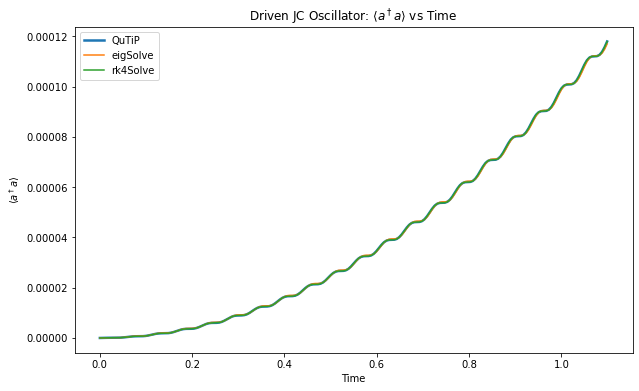

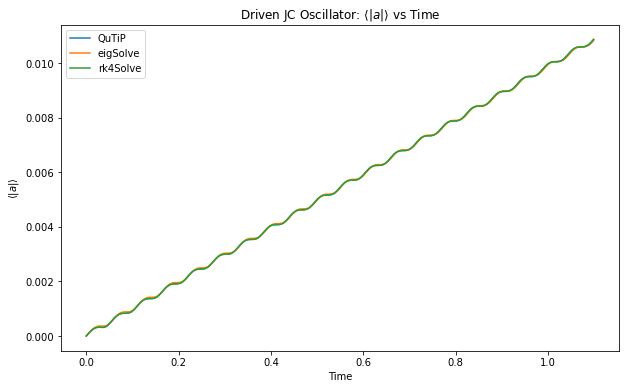

In [6]:
eigData = np.load('plotTestEig_data.npy')
rk4Data = np.load('plotTestRK4_data.npy')
fig = plt.figure(figsize=(10,6))
plt.title(r'Driven JC Oscillator: $\langle a^\dagger a\rangle$ vs Time')
plt.xlabel('Time')
plt.ylabel(r'$\langle a^\dagger a\rangle$')
plt.plot(t, data.expect[0], label='QuTiP', linewidth=2.5)
plt.plot(eigData[:,0], eigData[:,1], label='eigSolve')
plt.plot(rk4Data[:,0], rk4Data[:,1], label='rk4Solve')
plt.legend()
plt.savefig('num_op.png')
plt.show()


fig = plt.figure(figsize=(10,6))
plt.title(r'Driven JC Oscillator: $\langle \|a\| \rangle$ vs Time')
plt.xlabel('Time')
plt.ylabel(r'$\langle \|a\| \rangle$')
plt.plot(t, abs(data.expect[1]), label='QuTiP', linewidth=2.5)
plt.plot(eigData[:,0], eigData[:,2], label='eigSolve')
plt.plot(rk4Data[:,0], rk4Data[:,2], label='rk4Solve')
plt.legend()
plt.savefig('a_op.png')
plt.show()